### Estudio mercado de sobre establecimientos comerciales  en L.A.

Se desea desarrollar un estudio de mercado sobre establecimientos comerciales en L.A., California, EUA, para determinar las condiciones existentes en el mercado y posiblemente de la competencia, con el fin de atraer posibles inversionistas ante la apertura de un nuevo negocio de café en la zona. 

Los datos se concentran esencialmente en un sólo dataset que recoge la información perteneciente a distintos tipos de establecimientos a saber: restaurantes, panaderías, cafeterías y de comida rápida. Se recopila la información sobre el tipo de establecimiento, la cantidad de asientos existentes, la dirección en donde está ubicado, el nombre del lugar y si pertenece o no a una cadena. El dataset alberga 9651 registros.

El objetivo principal es acometer el presente estudio de mercado a partir de los datos procedentes de fuentes abiertas que  arroje claridad sobre las condiciones existentes para la apertura de un nuevo establecimiento de comercio de café en el área.

Link a la presentación preparada en PDF, y almacenada en Github.

Presentation: <https://github.com/dc36205/PortfolioProjects-DA/tree/main/Project10>

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as st
import plotly.express as px

from importlib import reload
plt=reload(plt)

In [167]:
# Carga el archivo de datos

df_restaurants_us = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/rest_data_us.csv')  

In [5]:
df_restaurants_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [6]:
df_restaurants_us.columns

Index(['id', 'object_name', 'address', 'chain', 'object_type', 'number'], dtype='object')

In [7]:
df_restaurants_us.shape

(9651, 6)

In [8]:
df_restaurants_us.head(5)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [9]:
df_restaurants_us.describe()

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


## Limpieza_y_Preparación_de_los_datos

Verificación_y_corrección_de_los_tipos_de_datos

In [10]:
# Convirtiendo la feature object_type al tipo de dato más adecuado en category

df_restaurants_us['object_type'] = df_restaurants_us['object_type'].astype('category') 

### Revisión de la existencia de valores duplicados 

In [12]:
df_restaurants_us.duplicated().sum()

0

### Revisión de la existencia de valores faltantes 

In [14]:
df_restaurants_us.isna().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [15]:
df_restaurants_us[df_restaurants_us['chain'].isna() == True].count()

id             3
object_name    3
address        3
chain          0
object_type    3
number         3
dtype: int64

In [16]:
# Deleting the NaNs rows in column chain
df_restaurants_us = df_restaurants_us.dropna(subset=['chain'])

In [17]:
df_restaurants_us.isna().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

In [18]:
df_restaurants_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           9648 non-null   int64   
 1   object_name  9648 non-null   object  
 2   address      9648 non-null   object  
 3   chain        9648 non-null   object  
 4   object_type  9648 non-null   category
 5   number       9648 non-null   int64   
dtypes: category(1), int64(2), object(3)
memory usage: 461.9+ KB


## Conclusión de la parte de limpieza y preparación de los datos

1- Se revisó el dataset encontrándose en la siguiente situación:

-existe 1 feature (chain) con un tipo de información designada como Object que podría ser de otra índole más adecuada.

-existe 1 feature (object_type) designada como Object que debería ser de tipo categórica

-se detectó la presencia de valores ausentes en la columna chain

Acciones correspondientes realizadas:

1- Se convirtió la columna 'chain' al tipo boolean que se considera que es más adecuado por el tipo de info que contiene.

2- Se convirtió la columna object_type al tipo category que se considera que es más adecuado por el tipo de info que contiene.

3- Se identificó la presencia de datos ausentes en la feature 'chain', que fueron corregidos, aplicando la eliminación de los mismos, ya que únicamente son 3 filas, y no representan una cantidad de datos significativa en el dataset, y que apenas representan es 0.03 % del total de los datos. 

4- No se encontraron problemas en los nombres de los features, o sea, todos los nombres están escritos de forma homogénea.

5- Se verificó la no existencia de valores duplicados en los datos.

6- También se apreció que existen valores extremos, lo que podría indicar la presencia de outliers o valores atípicos en los datos.

# Análisis de los datos 

In [19]:
df_restaurants_us.head(5)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [20]:
df_restaurants_us['id'].count()

9648

In [21]:
df_restaurants_us['number'].mean()

43.70356550580431

In [22]:
# Total de asientos por tipo de establecimiento
df_order_products_result = df_restaurants_us.groupby(['object_type'])['number'].sum().reset_index()
df_order_products_result

,object_type,number
0,Bakery,6162
1,Bar,13072
2,Cafe,10875
3,Fast Food,33939
4,Pizza,9106
5,Restaurant,348498


In [24]:
df_filtered = df_restaurants_us.groupby(['object_type'])['id'].count().reset_index()
listaad=df_filtered['object_type']
listaad

0        Bakery
1           Bar
2          Cafe
3     Fast Food
4         Pizza
5    Restaurant
Name: object_type, dtype: category
Categories (6, object): ['Bakery', 'Bar', 'Cafe', 'Fast Food', 'Pizza', 'Restaurant']

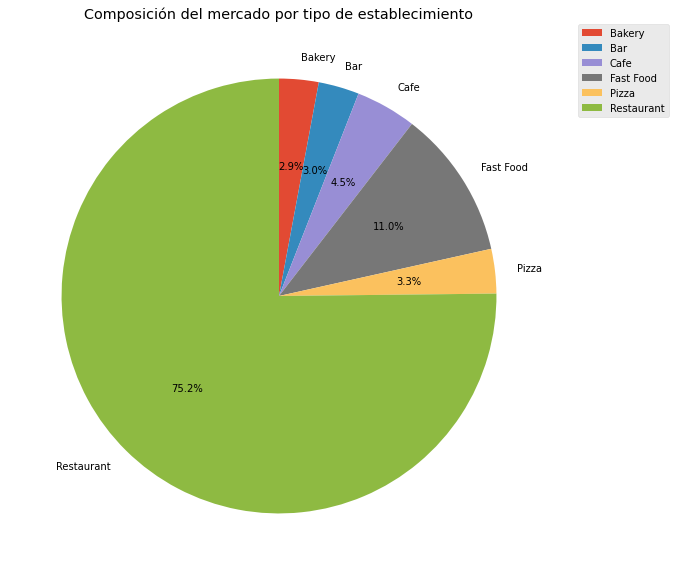

In [25]:
# Gráfico para investigar las proporciones de los distintos tipos de establecimientos.
# Se considera que el tipo de gráfico tipo pastel es adecuado para visualizar o representar las proporciones 

plt.style.use('ggplot')

fig, ax1=plt.subplots(1,1,figsize=(10,10))

labels =  ['Bakery', 'Bar', 'Cafe', 'Fast Food', 'Pizza', 'Restaurant'] 

ax1.pie(df_filtered['id'],labels=labels,autopct='%1.1f%%',counterclock=False,startangle=90)

ax1.set(title='Composición del mercado por tipo de establecimiento')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [26]:
df_filtered = df_restaurants_us.groupby(['chain'])['id'].count().reset_index()
df_filtered

,chain,id
0,False,5972
1,True,3676


De gráfico anterior se puede apreciar que la mayor proporción corresponde a los establecimientos de tipo Restaurant.

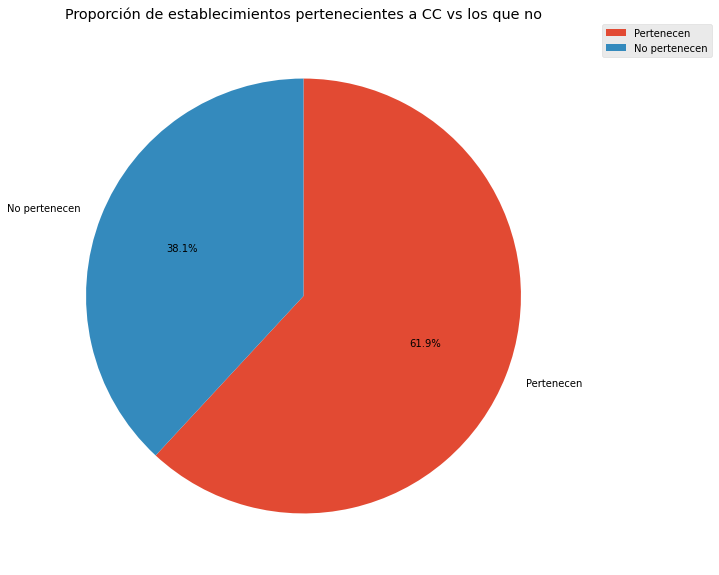

In [27]:
#Gráfico para investigar las proporciones de los establecimientos que pertenecen a una cadena y de los que no.

plt.style.use('ggplot')
fig, ax1=plt.subplots(1,1,figsize=(10,10))

labels =  ['Pertenecen', 'No pertenecen']

ax1.pie(df_filtered['id'], labels=labels, autopct='%1.1f%%',counterclock=False,startangle=90)
ax1.set(title='Proporción de establecimientos pertenecientes a CC vs los que no')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Del gráfico anterior, se aprecia que predominantes los establecimientos que no pertenecen a una cadena comercial.

In [28]:
df_filtered = pd.DataFrame()
df_filtered = df_restaurants_us.groupby(['object_type','chain'])['id'].count().reset_index()
df_filtered

,object_type,chain,id
0,Bakery,False,0
1,Bakery,True,283
2,Bar,False,215
3,Bar,True,77
4,Cafe,False,169
5,Cafe,True,266
6,Fast Food,False,461
7,Fast Food,True,605
8,Pizza,False,166
9,Pizza,True,153


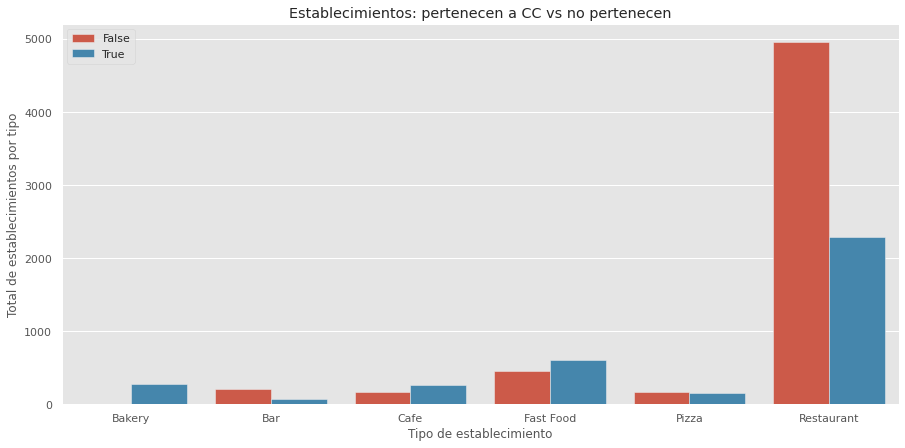

In [32]:
# Mejorando gráfico anterior, version-1 con Seaborn

plt.style.use('ggplot')
ax = sns.barplot(data = df_filtered, x='object_type', y= 'id', hue= 'chain')
ax.set_xlabel("Tipo de establecimiento")
ax.set_ylabel("Total de establecimientos por tipo")
plt.title("Establecimientos: pertenecen a CC vs no pertenecen") 
plt.rcParams['figure.figsize'] = [15, 7]
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., )

plt.legend(loc='upper left')
plt.show()

In [33]:
df_filtered = df_filtered.drop('chain', axis=1)
df_filtered

,object_type,id
0,Bakery,0
1,Bakery,283
2,Bar,215
3,Bar,77
4,Cafe,169
5,Cafe,266
6,Fast Food,461
7,Fast Food,605
8,Pizza,166
9,Pizza,153


<AxesSubplot:title={'center':'Establecimientos que son de una cadena'}, xlabel='Tipo de establecimiento', ylabel='Pertenencia a cadenas'>

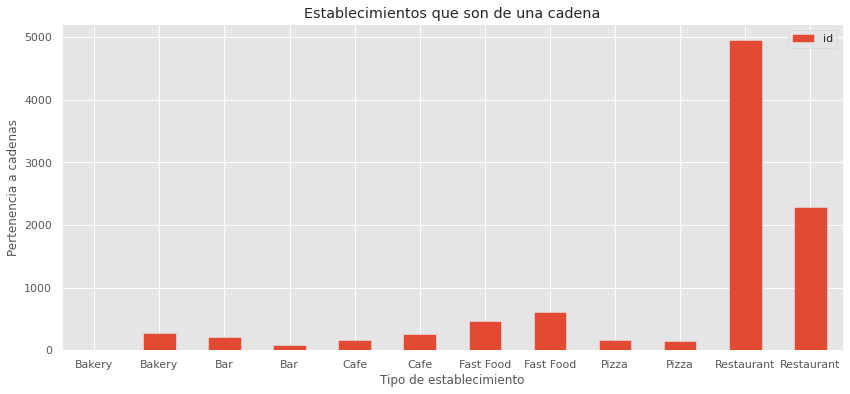

In [34]:
plt.style.use('ggplot')
df_filtered.plot(x='object_type', y='id', kind='bar',rot= 0, title='Establecimientos que son de una cadena', ylabel='Pertenencia a cadenas', xlabel='Tipo de establecimiento', figsize=(14, 6))


In [35]:
df_filt = pd.DataFrame()
mis_booleans= (df_restaurants_us['chain'] == False)
df_filt['places_in_chain'] = df_restaurants_us[mis_booleans].groupby(['object_type'])['id'].count()
df_filt

,places_in_chain
object_type,
Bakery,0
Bar,215
Cafe,169
Fast Food,461
Pizza,166
Restaurant,4961


Se aprecia en el gráfico previo que son los restaurants, aquellos establecimientos que predominan de entre los que no pertenecen a una cadena comercial con 4961 unidades.

In [36]:
df_filtered3 = pd.DataFrame()

mis_booleans= (df_restaurants_us['chain'] == True)
df_filtered3['places_in_chain'] = df_restaurants_us[mis_booleans].groupby(['object_type'])['id'].count()
df_filtered3

,places_in_chain
object_type,
Bakery,283
Bar,77
Cafe,266
Fast Food,605
Pizza,153
Restaurant,2292


In [37]:
df_filtered3['places_in_chain'].sum()

3676

In [38]:
new_valueglobal = 2292 / 9648
new_valueglobal = new_valueglobal*100
new_valueglobal

23.756218905472636

Del grupo de tipos de establecimientos que pertenecen a cadenas comerciales el de tipo Restaurant, con 2292 unidades, corresponde el 62.3 %  del total, no obstante, del gran total de establecimientos representan el 23.7%

In [39]:
# Caracterización de las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con
# un montón de asientos

df_new = pd.DataFrame()
mis_booleans= (df_restaurants_us['chain'] == True)
#df_new['num'] = df_restaurants_us[mis_booleans].groupby('object_type')['number'].sum()
df_new = df_restaurants_us[mis_booleans].groupby('object_type')['number'].sum().reset_index()
df_new

,object_type,number
0,Bakery,6162
1,Bar,3100
2,Cafe,6894
3,Fast Food,23044
4,Pizza,3906
5,Restaurant,102810


No handles with labels found to put in legend.
No handles with labels found to put in legend.


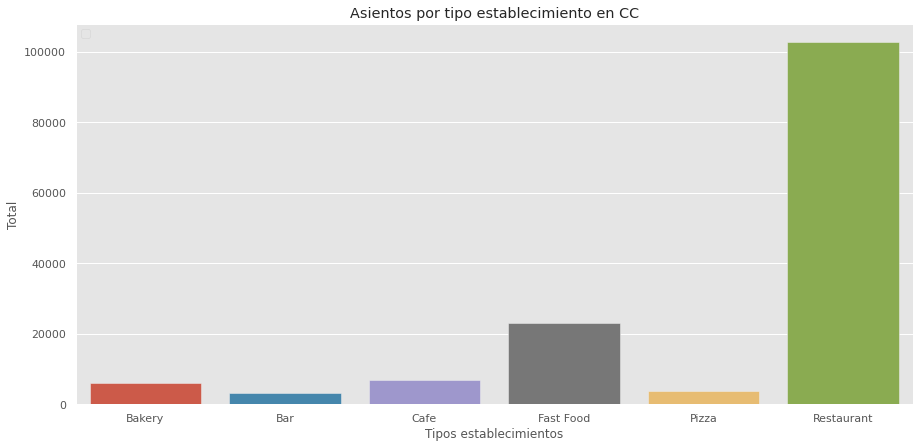

In [41]:
plt.style.use('ggplot')
ax = sns.barplot(data = df_new, x='object_type', y= 'number')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_xlabel("Tipos establecimientos")
ax.set_ylabel("Total")
plt.title("Asientos por tipo establecimiento en CC") 
plt.rcParams['figure.figsize'] = [15, 7]
plt.legend(loc='upper left')

plt.show()

In [42]:
df_neww = pd.DataFrame()
mis_booleans= (df_restaurants_us['chain'] == False)
df_neww = df_restaurants_us[mis_booleans].groupby('object_type')['number'].sum().reset_index()
df_neww

,object_type,number
0,Bakery,0
1,Bar,9972
2,Cafe,3981
3,Fast Food,10895
4,Pizza,5200
5,Restaurant,245688


No handles with labels found to put in legend.
No handles with labels found to put in legend.


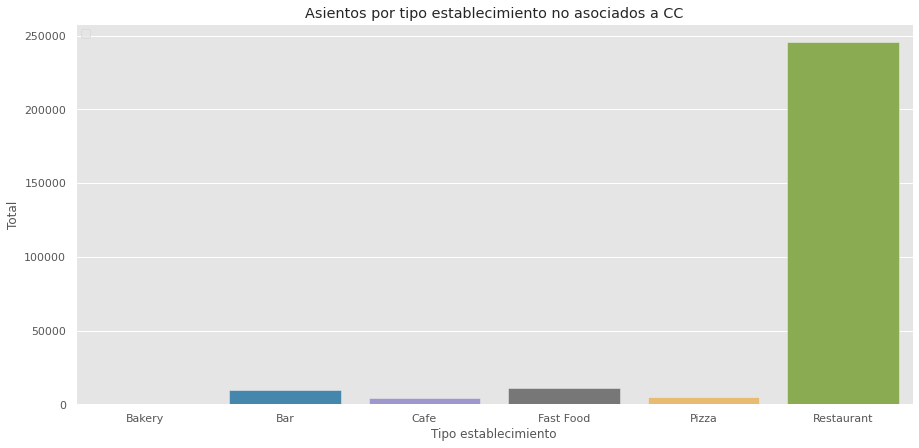

In [44]:
plt.style.use('ggplot')
ax = sns.barplot(data = df_neww, x='object_type', y= 'number')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_xlabel("Tipo establecimiento")
ax.set_ylabel("Total")
plt.title("Asientos por tipo establecimiento no asociados a CC") 
plt.rcParams['figure.figsize'] = [15, 7]
plt.legend(loc='upper left')

plt.show()

In [45]:
df_aparte = pd.DataFrame()
mis_booleans= (df_restaurants_us['chain'] == True)
df_aparte = df_restaurants_us[mis_booleans] 
df_aparte

,id,object_name,address,chain,object_type,number
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26
...,...,...,...,...,...,...
9629,21415,JUCUAPA BAKERY,2810 JAMES WOOD BLVD,True,Bakery,10
9636,21422,CHIPOTLE #3094,6719 LA TIJERA BLVD # A-B,True,Restaurant,47
9639,21425,MCDONALD'S,1800 S WESTERN AVE,True,Fast Food,135
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15


In [46]:
df_aparte['number'].mean()

39.69423286180631

In [47]:
# Se adoptó una clasificación par ilustar mejor las diferencias de cantidad de asientos :
# -un establecimiento con hasta 10 asientos es pequeño,
# -un establecimiento con entre 10 a 30 asientos es mediano, 
# -un establecimiento por encima de 30 asientos se cataloga como establecimiento grande 

data_query1 = df_aparte[(df_aparte['number'] <= 10)]
data_query1

,id,object_name,address,chain,object_type,number
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
35,11821,REGGIE'S DELI & CAFE,1910 W SUNSET BLVD STE 150,True,Restaurant,1
58,11844,BASE COAT -JUICE BAR,704 MATEO ST,True,Bar,2
82,11868,SUBWAY #39685,704 W 1ST ST,True,Fast Food,3
97,11883,K-BAKERY,1258 W TEMPLE ST,True,Bakery,6
...,...,...,...,...,...,...
9584,21370,IVAN'S RESTAURANT,1811 W 7TH ST,True,Restaurant,10
9590,21376,PIRATES MEXICAN FOOD,8511 S BROADWAY,True,Restaurant,5
9608,21394,GO GET EM TIGER,230 N LARCHMONT BLVD,True,Restaurant,5
9627,21413,PIZZA BUONA,922 N ALAVARADO ST STE C,True,Pizza,5


In [48]:
df_new_intermedio1 = pd.DataFrame()
df_new_intermedio1['num'] = data_query1.groupby('object_type')['number'].count() 
df_new_intermedio1.mean()

num    117.666667
dtype: float64

In [49]:
df_new_intermedio11 = pd.DataFrame()
df_new_intermedio11['num'] = data_query1.groupby('object_type')['number'].sum() 
df_new_intermedio11.mean() # 627 asientos en promedio

num    627.833333
dtype: float64

In [50]:
df_new_intermedio11.reset_index()

,object_type,num
0,Bakery,441
1,Bar,69
2,Cafe,328
3,Fast Food,655
4,Pizza,234
5,Restaurant,2040


In [51]:
df_new_intermedio11 = df_new_intermedio11.drop( df_new_intermedio11[df_new_intermedio11.num > 2039].index)
df_new_intermedio11 #345.4 de asientos en promedio luego de quitar a los restaurantes

,num
object_type,
Bakery,441
Bar,69
Cafe,328
Fast Food,655
Pizza,234


In [52]:
df_new_intermedio11.mean()

num    345.4
dtype: float64

<AxesSubplot:title={'center':'Establecimientos en cadenas comerciales con hasta 10 asientos'}, xlabel='Grupos', ylabel='num'>

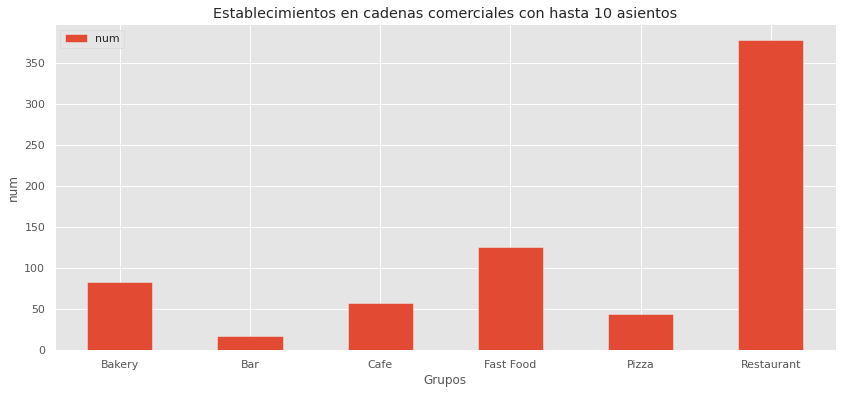

In [53]:
df_new_intermedio1.plot(kind='bar', rot= 0, title='Establecimientos en cadenas comerciales con hasta 10 asientos', ylabel='num', xlabel='Grupos', figsize=(14, 6))

In [54]:
data_query2 = df_aparte[( df_aparte['number'] > 10) & (df_aparte['number'] <= 30)]
data_query2

,id,object_name,address,chain,object_type,number
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26
15,11801,FOOD COURT TRAY WASHING AREA,928 S WESTERN AVE STE 300,True,Restaurant,21
29,11815,KRISPY KRUNCHY CHICKEN - ALVARADO,600 S ALVARADO ST STE 111C,True,Restaurant,15
34,11820,MUSH BAKERY,5224 W SUNSET BLVD,True,Bakery,15
...,...,...,...,...,...,...
9601,21387,LENNY'S DELI,2379 WESTWOOD BLVD,True,Restaurant,24
9605,21391,YAMAKASE,11901 SANTA MONICA BLVD # 111,True,Restaurant,22
9618,21404,JUCUAPA RESTAURANT,2814 JAMES WOOD BLVD,True,Restaurant,19
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15


In [55]:
df_new_intermedio2 = pd.DataFrame()
df_new_intermedio2['num'] = data_query2.groupby('object_type')['number'].count() 
df_new_intermedio2.mean()

num    242.5
dtype: float64

In [56]:
df_new_intermedio22 = pd.DataFrame()
df_new_intermedio22['num'] = data_query2.groupby('object_type')['number'].sum() 
df_new_intermedio22 # 4822 asientos en promedio

,num
object_type,
Bakery,3246
Bar,690
Cafe,2367
Fast Food,5006
Pizza,1500
Restaurant,16128


In [57]:
df_new_intermedio22 = df_new_intermedio22.drop( df_new_intermedio22[df_new_intermedio22.num > 16127].index)
df_new_intermedio22 #  de asientos en promedio luego de quitado a los restaurantes

,num
object_type,
Bakery,3246
Bar,690
Cafe,2367
Fast Food,5006
Pizza,1500


In [58]:
df_new_intermedio22.mean()  # 2561.8 asientos luego de quitados a los restaurantes 

num    2561.8
dtype: float64

<AxesSubplot:title={'center':'Establecimientos en cadenas comerciales con entre 10  y 30 asientos'}, xlabel='Grupos', ylabel='num'>

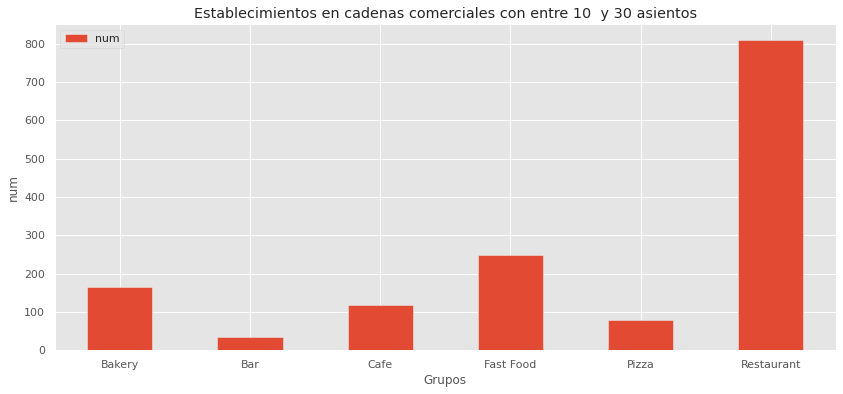

In [59]:
df_new_intermedio2.plot(kind='bar', rot= 0, title='Establecimientos en cadenas comerciales con entre 10  y 30 asientos', ylabel='num', xlabel='Grupos', figsize=(14, 6))

In [60]:
data_query3 = df_aparte[(df_aparte['number'] > 30)]
data_query3

,id,object_name,address,chain,object_type,number
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
24,11810,M CAFE DE CHAYA,7119 MELROSE AVE,True,Restaurant,43
27,11813,NORM'S RESTAURANT,470 N LA CIENEGA BLVD,True,Restaurant,80
31,11817,DUNES RESTAURANT,5625 W SUNSET BLVD,True,Restaurant,118
...,...,...,...,...,...,...
9578,21364,IRENE'S RESTAURANT,2215 S CENTRAL AVE,True,Restaurant,35
9595,21381,STICKY RICE ECHO PARK,1801 SUNSET BLVD,True,Restaurant,44
9621,21407,RED ROCK,11301 W OLYMPIC BLVD # 210,True,Restaurant,41
9636,21422,CHIPOTLE #3094,6719 LA TIJERA BLVD # A-B,True,Restaurant,47


In [61]:
df_new_intermedio3 = pd.DataFrame()
df_new_intermedio3['num'] = data_query3.groupby('object_type')['number'].count() 
df_new_intermedio3.mean() # 252 estblecimientos

num    252.5
dtype: float64

In [62]:
df_new_intermedio33 = pd.DataFrame()
df_new_intermedio33['num'] = data_query3.groupby('object_type')['number'].sum() 
df_new_intermedio33 # 18868 asientos en promedio

,num
object_type,
Bakery,2475
Bar,2341
Cafe,4199
Fast Food,17383
Pizza,2172
Restaurant,84642


In [63]:
df_new_intermedio33 = df_new_intermedio33.drop( df_new_intermedio33[df_new_intermedio33.num > 84641].index)
df_new_intermedio33 # 5714 de asientos en promedio luego de quitados a los restaurantes

,num
object_type,
Bakery,2475
Bar,2341
Cafe,4199
Fast Food,17383
Pizza,2172


In [64]:
df_new_intermedio33.mean()

num    5714.0
dtype: float64

<AxesSubplot:title={'center':'Establecimientos en cadenas comerciales con más de 30 asientos'}, xlabel='Grupos', ylabel='num'>

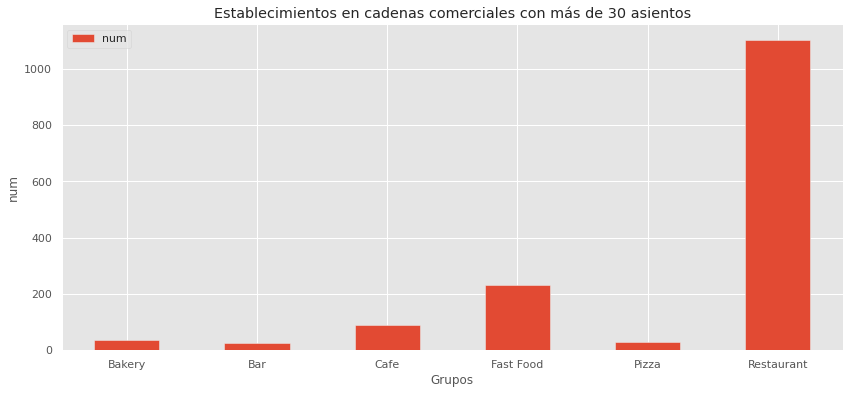

In [65]:
df_new_intermedio3.plot(kind='bar', rot= 0, title='Establecimientos en cadenas comerciales con más de 30 asientos', ylabel='num', xlabel='Grupos', figsize=(14, 6))

Conclusión de esta parte: Para la caracterización de las cadenas comerciales se adoptó una clasificación tomando en cuenta la cantidad de asientos dividida en 3 categorías, a saber: establecimientos pequeños (hasta 10 asientos), establecimientos medianos o con cantidad moderada (entre 10 a 30 asientos), establecimientos grandes (cantidad de asientos superior a 30). 

Se obtuvo como resultado que los establecimientos de tipo restaurantes predominan en las 3 categorías. 

En base a la clasificación adoptada y exceptuando el hecho que restaurantes predominan en todas las categorías, para el resto de los establecimientos, se considera que están caracterizados en general por una cantidad moderada (10 a 30), pues se observó que esta cantidad se distribuye de manera más homogénea o uniforme entre estos tipos de establecimientos.

Para explorar la diferencia entre los grupos de establecimientos que pertenecen a cadenas comerciales entre las distintas categorías adoptadas y observando que los restaurantes predominan en todas las categorías, se procede a retirar el valor de los restaurantes en cada categoría con el fin de obtener un valor más homogéneo en el promedio de asientos en cada grupo, obteniendo:

Grupo-1 hasta 10 asientos
-117.6 establecimientos
-627 promedio de asientos con los restaurants
-345.4 promedio de asientos sin los restaurants

Grupo-2 10 a 30  asientos
-242 establecimientos
-4822 promedio de asientos con los restaurants
-2561.8 promedio de asientos sin los restaurants

Grupo-3 con más de 30  asientos
-252.5 establecimientos
-18868 promedio de asientos con los restaurants
-5714 promedio de asientos sin los restaurants

Se observa que el menor de los grupos cuenta con 345.4 asientos en promedio sin los restaurantes. La cifra de 345.4 asientos se considera una cantidad grande de asientos para un establecimiento.

En resumen conclusión: los establecimientos en cadenas comerciales se caracterizan por tener muchos asientos, y en prmedio global tienen 43.7 asientos

In [121]:
# Gráfico para determinar el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de 
#restaurante tiene el mayor número de asientos

# Existen 2 tipos de restaurantes: -los que pertenecen a una CC y los que no

df_new = pd.DataFrame()
mis_booleans= (df_restaurants_us['chain'] == True) & (df_restaurants_us['object_type']=='Restaurant')
df_only_restaurant_CC = df_restaurants_us[mis_booleans]
valor= df_only_restaurant_CC['number'].mean()
valor

44.85602094240838

In [122]:
df_new = pd.DataFrame()
mis_booleans= (df_restaurants_us['chain'] == False) & (df_restaurants_us['object_type']=='Restaurant')
df_only_restaurant_CC = df_restaurants_us[mis_booleans]
valor= df_only_restaurant_CC['number'].mean()
valor

49.523886313243295

En promedio hay 44.8 asientos por restaurante asociados a CC y 50 asientos por restaurante no asociado a CC.

In [128]:
# Hallando restaurante asociado a CC con mayor número de asientos 

data_query4 = pd.DataFrame()
mis_booleans= (df_restaurants_us['chain'] == True) & (df_restaurants_us['object_type'] == 'Restaurant')
data_query4 = df_restaurants_us[mis_booleans] 
data_query4

,id,object_name,address,chain,object_type,number
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
15,11801,FOOD COURT TRAY WASHING AREA,928 S WESTERN AVE STE 300,True,Restaurant,21
24,11810,M CAFE DE CHAYA,7119 MELROSE AVE,True,Restaurant,43
27,11813,NORM'S RESTAURANT,470 N LA CIENEGA BLVD,True,Restaurant,80
...,...,...,...,...,...,...
9608,21394,GO GET EM TIGER,230 N LARCHMONT BLVD,True,Restaurant,5
9618,21404,JUCUAPA RESTAURANT,2814 JAMES WOOD BLVD,True,Restaurant,19
9621,21407,RED ROCK,11301 W OLYMPIC BLVD # 210,True,Restaurant,41
9636,21422,CHIPOTLE #3094,6719 LA TIJERA BLVD # A-B,True,Restaurant,47


In [129]:
data_query4.sort_values(by='number', ascending=False).head(20)

,id,object_name,address,chain,object_type,number
594,12380,KABUKI JAPANESE RESTAURANT,1545 N VINE ST,True,Restaurant,229
7383,19169,MANNA KOREAN BBQ,3986 WILSHIRE BLVD,True,Restaurant,229
475,12261,MOUNTAINGATE COUNTRY CLUB,12445 MOUNTAIN GATE DR,True,Restaurant,229
5478,17264,CHUCK E CHEESE'S #397,2706 WILSHIRE BLVD,True,Restaurant,228
457,12243,USC MAIN KITCHEN-BASEMENT,3607 TROUSDALE PKWY,True,Restaurant,227
1064,12850,CHOSUN GALBEE RESTAURANT,3330 W OLYMPIC BLVD,True,Restaurant,226
1612,13398,CALIFORNIA CLUB-MAIN KITCHEN,538 S FLOWER ST,True,Restaurant,225
1928,13714,LA FONDA RESTAURANT,2501 WILSHIRE BLVD,True,Restaurant,225
122,11908,TRASTEVERE RESTAURANT,6801 HOLLYWOOD BLVD STE 423,True,Restaurant,224
9438,21224,MEZZO GARDEN RESTAURANT,2516 COLORADO BLVD,True,Restaurant,222


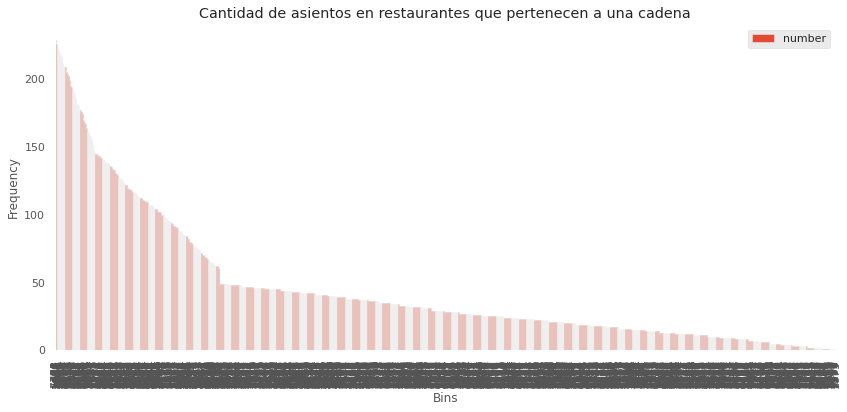

In [127]:
plt.style.use('ggplot')
data_query4_temp = data_query4[['object_name', 'number']]
data_query4_temp.sort_values(by='number', ascending=False).plot(kind="bar",figsize=(14, 6))
plt.title('Cantidad de asientos en restaurantes que pertenecen a una cadena')
plt.ylabel('Frequency')
plt.xlabel('Bins')
plt.legend(loc='upper right')

In [130]:
# Hallando restaurante no asociado a CC con mayor número de asientos 

data_query5 = pd.DataFrame()
mis_booleans= (df_restaurants_us['chain'] == False) & (df_restaurants_us['object_type'] == 'Restaurant')
data_query5 = df_restaurants_us[mis_booleans] 
data_query5

,id,object_name,address,chain,object_type,number
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100
...,...,...,...,...,...,...
9642,21428,TOLOSA,2635 WHITTIER BLVD,False,Restaurant,19
9643,21429,DIVINE DIPS,601 S LOS ANGELES ST,False,Restaurant,25
9645,21431,SAINT MARC,10250 SANTA MONICA BLVD # 1025,False,Restaurant,225
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122


In [131]:
data_query5.sort_values(by='number', ascending=False).head(20)

,id,object_name,address,chain,object_type,number
4626,16412,PLAYHOUSE,6506 HOLLYWOOD BLVD,False,Restaurant,229
8699,20485,VIBIANA,210 S MAIN ST,False,Restaurant,229
3277,15063,AMERICAN JEWISH UNIVERSITY,15600 MULHOOLAND DR,False,Restaurant,229
3495,15281,USC UNIVERSITY CLUB,705 W 34TH ST,False,Restaurant,229
5091,16877,BOULEVARD 3,6523 W SUNSET BLVD,False,Restaurant,229
4854,16640,WOKCANO DOWNTOWN L.A.,800 W 7TH ST,False,Restaurant,229
5965,17751,DREAMS,1717 SILVERLAKE BLVD,False,Restaurant,228
3332,15118,X BOUND,3470 WILSHIRE BLVD STE #1,False,Restaurant,228
1621,13407,CROWNE PLAZA LAX LANDING,5985 W CENTURY BLVD,False,Restaurant,228
8709,20495,REJUVENATE CAFE,4733 W SUNSET BLVD STE 233,False,Restaurant,228


Conclusión:  

Se encontró que entre los restaurantes no asociados a CC existen 6 con igual cantidad máxima de asientos de 229, por otro lado, entre los restaurantes asociados a CC, se encontró que existen 3 con la misma cantidad máxima de asientos de 229, por tanto la cantidad máxima de asientos es compartida entre restaurantes de ambos grupos asociados a CC y los que no. 

In [132]:
# Colocar los datos de los nombres de las calles de la columna address en una columna separada.

df_restaurants_us.head(5)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [133]:
df_restaurants_us.columns

Index(['id', 'object_name', 'address', 'chain', 'object_type', 'number'], dtype='object')

In [134]:
df_restaurants_us['address_zip_code'] = df_restaurants_us['address'].str.extract(r"\b(\d{4})\b")
df_restaurants_us['address_zip_code'] 

0       3708
1        NaN
2       6801
3       1814
4       2100
        ... 
9646     NaN
9647    5750
9648    6741
9649     NaN
9650    1300
Name: address_zip_code, Length: 9648, dtype: object

In [135]:
df_restaurants_us.head(10)

,id,object_name,address,chain,object_type,number,address_zip_code
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,3708
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,NaN
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,6801
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,1814
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,2100
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14,NaN
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100,NaN
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7,3500
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1,3027
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35,3707


In [136]:
df_restaurants_us['address_number'] = df_restaurants_us['address'].str.extract(r'(?P<StreetNo>\d{,5})')
df_restaurants_us['address_number']

0       3708
1        100
2       6801
3       1814
4       2100
        ... 
9646     217
9647    5750
9648    6741
9649     548
9650    1300
Name: address_number, Length: 9648, dtype: object

In [137]:
data_query6 = pd.DataFrame()
pat = r'^(?P<number>\d+)?(?P<street>.+(?=\bapt|\bunit)|.+(?=#)|.+)(?P<apt_unit>(?:\bapt|\bunit|#).+)?'
data_query6= df_restaurants_us.address.str.extract(pat)

In [138]:
data_query6

,number,street,apt_unit
0,3708,N EAGLE ROCK BLVD,NaN
1,100,WORLD WAY,# 120
2,6801,HOLLYWOOD BLVD,# 253
3,1814,W SUNSET BLVD,NaN
4,2100,ECHO PARK AVE,NaN
...,...,...,...
9646,217,W TEMPLE AVE,NaN
9647,5750,MELROSE AVE,NaN
9648,6741,HOLLYWOOD BLVD,NaN
9649,548,S SPRING ST STE 100,NaN


In [139]:
data_query6 =  data_query6.rename(columns={'number': 'address_number', 'street': 'street', 'apt_unit': 'apt_unit'})
data_query6

,address_number,street,apt_unit
0,3708,N EAGLE ROCK BLVD,NaN
1,100,WORLD WAY,# 120
2,6801,HOLLYWOOD BLVD,# 253
3,1814,W SUNSET BLVD,NaN
4,2100,ECHO PARK AVE,NaN
...,...,...,...
9646,217,W TEMPLE AVE,NaN
9647,5750,MELROSE AVE,NaN
9648,6741,HOLLYWOOD BLVD,NaN
9649,548,S SPRING ST STE 100,NaN


In [140]:
data_query6 = data_query6.drop('apt_unit', axis=1)

In [141]:
data_query6.isna().sum()

address_number    8
street            0
dtype: int64

In [142]:
data_query6= data_query6.dropna()

In [143]:
data_query6

,address_number,street
0,3708,N EAGLE ROCK BLVD
1,100,WORLD WAY
2,6801,HOLLYWOOD BLVD
3,1814,W SUNSET BLVD
4,2100,ECHO PARK AVE
...,...,...
9646,217,W TEMPLE AVE
9647,5750,MELROSE AVE
9648,6741,HOLLYWOOD BLVD
9649,548,S SPRING ST STE 100


In [144]:
df_restaurants_us.isna().sum()

id                     0
object_name            0
address                0
chain                  0
object_type            0
number                 0
address_zip_code    3345
address_number         0
dtype: int64

In [145]:
df_restaurants_us = df_restaurants_us.drop('address_zip_code', axis=1)

In [146]:
df_restaurants_us.isna().sum()

id                0
object_name       0
address           0
chain             0
object_type       0
number            0
address_number    0
dtype: int64

### nota Se eliminaron varias de las columnas entrre ellas address_zip_code  pues no son requeredas para lo que se solicita.

In [147]:
df_restaurants_us_merging_all = df_restaurants_us.join(data_query6, lsuffix="_right")

In [148]:
df_restaurants_us_merging_all

,id,object_name,address,chain,object_type,number,address_number_right,address_number,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,3708,3708,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,100,100,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,6801,6801,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,1814,1814,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,2100,2100,ECHO PARK AVE
...,...,...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,217,217,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,5750,5750,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,6741,6741,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,548,548,S SPRING ST STE 100


###   Gráfico de las diez mejores calles por número de restaurantes

In [149]:
df_restaurants_us_merging_all.columns

Index(['id', 'object_name', 'address', 'chain', 'object_type', 'number',
       'address_number_right', 'address_number', 'street'],
      dtype='object')

In [150]:
df_restaurants_us_merging_all_reduced =  df_restaurants_us_merging_all.drop(['object_name', 'address', 'chain', 
       'address_number_right', 'address_number','number'], axis=1)

In [151]:
# Dejando solamente aquellas calles con restaurantes 

df_restaurants_us_merging_all_reduced = df_restaurants_us_merging_all_reduced[df_restaurants_us_merging_all_reduced['object_type'] == 'Restaurant']
df_restaurants_us_merging_all_reduced

,id,object_type,street
1,11787,Restaurant,WORLD WAY
3,11789,Restaurant,W SUNSET BLVD
4,11790,Restaurant,ECHO PARK AVE
5,11791,Restaurant,NATIONAL BLVD
6,11792,Restaurant,WORLD WAY
...,...,...,...
9643,21429,Restaurant,S LOS ANGELES ST
9645,21431,Restaurant,SANTA MONICA BLVD
9646,21432,Restaurant,W TEMPLE AVE
9647,21433,Restaurant,MELROSE AVE


In [152]:
dfulti = df_restaurants_us_merging_all_reduced.groupby('street')['id'].count().reset_index()
dfulti

,street,id
0,1/2 3RD ST,1
1,1/2 BEVERLY BLVD,3
2,1/2 COLORADO BLVD,1
3,1/2 E 1ST ST,6
4,1/2 E 2ND ST,1
...,...,...
1748,YUCCA ST,2
1749,Z00 DR,1
1750,ZONAL AVE,1
1751,ZOO DR,1


In [153]:
dfulti_sorted_10first = dfulti.sort_values(by='id', ascending=False).head(10)
dfulti_sorted_10first

,street,id
1544,W PICO BLVD,218
1566,W SUNSET BLVD,217
422,HOLLYWOOD BLVD,136
1647,WILSHIRE BLVD,131
1310,W 3RD ST,119
1182,SANTA MONICA BLVD,107
1505,W OLYMPIC BLVD,107
1089,S VERMONT AVE,107
528,MELROSE AVE,106
119,BEVERLY BLVD,103


No handles with labels found to put in legend.
No handles with labels found to put in legend.


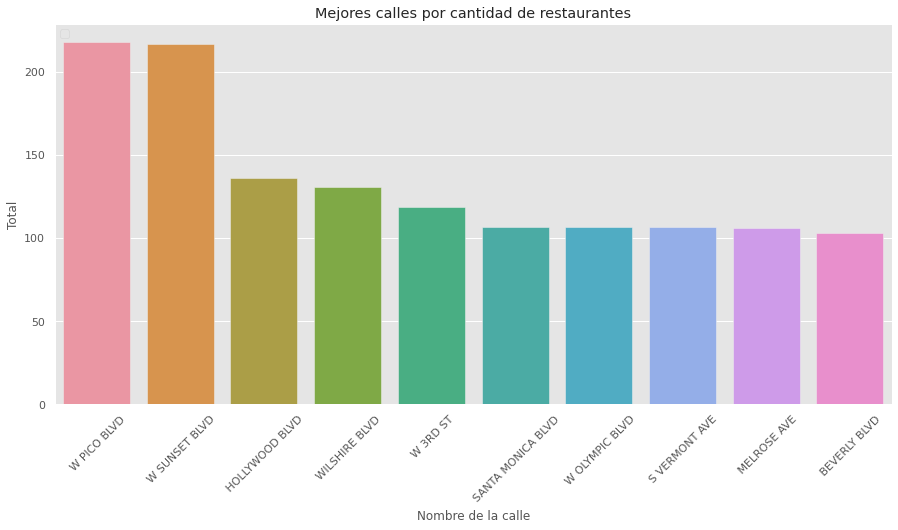

In [156]:
# Mejorando gráfico anterior, version-2 con Seaborn

plt.style.use('ggplot')
ax = sns.barplot(data = dfulti_sorted_10first, x='street', y= 'id')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)
ax.set_xlabel("Nombre de la calle")
ax.set_ylabel("Total")
plt.title("Mejores calles por cantidad de restaurantes") 
plt.rcParams['figure.figsize'] = [15, 7]
plt.legend(loc='upper left')
plt.show()

Del gráfico anterior se puede apreciar que las 10 primeras calles o avenidas con la mayor cantidad de restaurantes, siendo las mismas W SUNSET BLVD con 217 y W PICO BLVD con 218, respectivamente. 

In [158]:
# Encontrando el número de calles que sólo tienen un restaurante

dfulti_sorted = pd.DataFrame()
dfulti_sorted = dfulti.sort_values(by='id', ascending=False).reset_index()
dfulti_sorted

,index,street,id
0,1544,W PICO BLVD,218
1,1566,W SUNSET BLVD,217
2,422,HOLLYWOOD BLVD,136
3,1647,WILSHIRE BLVD,131
4,1310,W 3RD ST,119
...,...,...,...
1748,722,N WESTERN BLVD,1
1749,721,N WESTERN AVE STE 7,1
1750,720,N WESTERN AVE STE 6,1
1751,719,N WESTERN AVE STE 111,1


In [159]:
dfulti_sorted_only_one_place = dfulti_sorted[dfulti_sorted['id'] == 1]
dfulti_sorted_only_one_place

,index,street,id
555,1697,WILSHIRE BLVD STE A-1,1
556,1223,SAWTELLE BLVD STE 200,1
557,1698,WILSHIRE BLVD STE A11,1
558,1222,SAWTELLE BLVD STE 110,1
559,1224,SAWTLLE BLVD,1
...,...,...,...
1748,722,N WESTERN BLVD,1
1749,721,N WESTERN AVE STE 7,1
1750,720,N WESTERN AVE STE 6,1
1751,719,N WESTERN AVE STE 111,1


In [160]:
dfulti_sorted_only_one_place['id'].count()

1198

Luego del conteo anterior existen 1198 calles que sólo tienen un restaurante. 

### Para las calles con muchos restaurantes, analiza la distribución del número de asientos. 

In [161]:
df_restaurants_us_merging_all_reduced2 =  df_restaurants_us_merging_all.drop(['object_name', 'address', 'chain', 
       'address_number_right', 'address_number'], axis=1)

df_restaurants_us_merging_all_reduced2

,id,object_type,number,street
0,11786,Cafe,26,N EAGLE ROCK BLVD
1,11787,Restaurant,9,WORLD WAY
2,11788,Fast Food,20,HOLLYWOOD BLVD
3,11789,Restaurant,22,W SUNSET BLVD
4,11790,Restaurant,20,ECHO PARK AVE
...,...,...,...,...
9646,21432,Restaurant,122,W TEMPLE AVE
9647,21433,Restaurant,93,MELROSE AVE
9648,21434,Fast Food,15,HOLLYWOOD BLVD
9649,21435,Cafe,6,S SPRING ST STE 100


In [162]:
# Dejando solamente aquellas calles con restaurantes 

df_rests_us_merged_only = df_restaurants_us_merging_all_reduced2[df_restaurants_us_merging_all_reduced2['object_type'] == 'Restaurant']
df_rests_us_merged_only

,id,object_type,number,street
1,11787,Restaurant,9,WORLD WAY
3,11789,Restaurant,22,W SUNSET BLVD
4,11790,Restaurant,20,ECHO PARK AVE
5,11791,Restaurant,14,NATIONAL BLVD
6,11792,Restaurant,100,WORLD WAY
...,...,...,...,...
9643,21429,Restaurant,25,S LOS ANGELES ST
9645,21431,Restaurant,225,SANTA MONICA BLVD
9646,21432,Restaurant,122,W TEMPLE AVE
9647,21433,Restaurant,93,MELROSE AVE


In [163]:
df_top_avenues_most_rest_us = df_rests_us_merged_only.groupby(['street'])['number'].sum().reset_index().sort_values(by='number', ascending=False).head(20)
df_top_avenues_most_rest_us 

,street,number
1566,W SUNSET BLVD,12088
1544,W PICO BLVD,9857
1647,WILSHIRE BLVD,8786
422,HOLLYWOOD BLVD,7948
1505,W OLYMPIC BLVD,6382
528,MELROSE AVE,5853
1310,W 3RD ST,5671
119,BEVERLY BLVD,5343
875,S FIGUEROA ST,5316
1089,S VERMONT AVE,5119


No handles with labels found to put in legend.
No handles with labels found to put in legend.


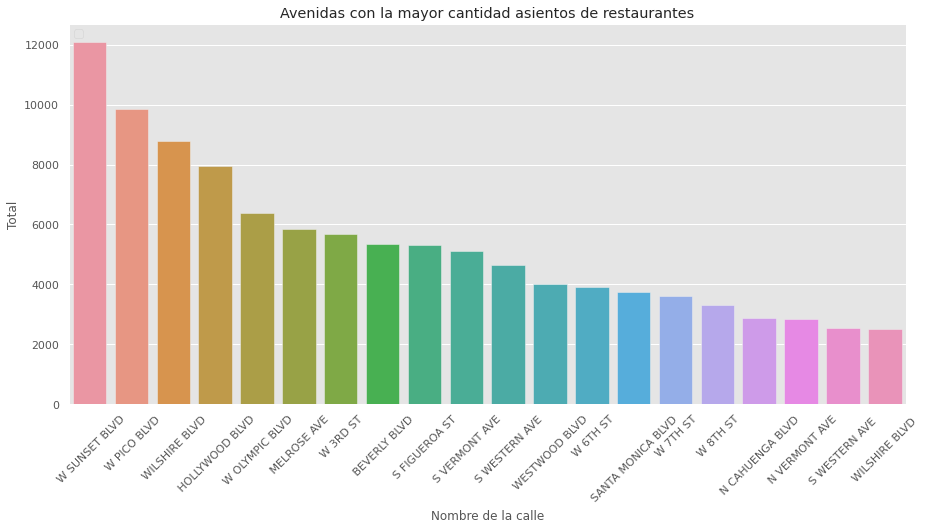

In [164]:
# Mejorando gráfico anterior, version-2 con Seaborn

plt.style.use('ggplot')
ax = sns.barplot(data = df_top_avenues_most_rest_us, x='street', y= 'number')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)
ax.set_xlabel("Nombre de la calle")
ax.set_ylabel("Total")
plt.title("Avenidas con la mayor cantidad asientos de restaurantes") 
plt.rcParams['figure.figsize'] = [15, 7]
plt.legend(loc='upper left')

plt.show()

Del gráfico anterior, se puede apreciar que en el listado de las top 20 avenidas con mayor cantidad de asientos para comensales se encuentran W SUNSET BLVD y W PICO BLVD, mismas que concentran la mayor cantidad de restaurantes, y se aprecia además que en el resto de las avenidas subsecuentes el número de establecimientos gradualmente va disminuyendo.

In [165]:
# Analizando un poco más de cerca los datos de los top 20 avenues con la mayor cantidad asientos de restaurantes

df_rests_us_merged_only_full_table = df_restaurants_us_merging_all[df_restaurants_us_merging_all['object_type'] == 'Restaurant']
df_rests_us_merged_only_full_table

,id,object_name,address,chain,object_type,number,address_number_right,address_number,street
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,100,100,WORLD WAY
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,1814,1814,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,2100,2100,ECHO PARK AVE
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14,10004,10004,NATIONAL BLVD
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100,100,100,WORLD WAY
...,...,...,...,...,...,...,...,...,...
9643,21429,DIVINE DIPS,601 S LOS ANGELES ST,False,Restaurant,25,601,601,S LOS ANGELES ST
9645,21431,SAINT MARC,10250 SANTA MONICA BLVD # 1025,False,Restaurant,225,10250,10250,SANTA MONICA BLVD
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,217,217,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,5750,5750,MELROSE AVE


In [166]:
df_top_avenues_most_rest_us1 = df_rests_us_merged_only_full_table.groupby(['street', 'chain'])['number'].sum().reset_index().sort_values(by='number', ascending=False).head(20)
df_top_avenues_most_rest_us1

,street,chain,number
1891,W SUNSET BLVD,False,8899
1862,W PICO BLVD,False,7263
1990,WILSHIRE BLVD,False,6358
514,HOLLYWOOD BLVD,False,5829
639,MELROSE AVE,False,4828
1581,W 3RD ST,False,4427
139,BEVERLY BLVD,False,4314
1815,W OLYMPIC BLVD,False,4209
1067,S FIGUEROA ST,False,4140
1355,S WESTERN AVE,False,3356


Al analizar un poco más de cerca los datos de las top 20 avenidas con el mayor número de asientos en restaurantes, se aprecia que solamente existen 3 avenidas con restaurantes que pertenecen a CC, el resto de los establecimientos no tiene esta condición, lo cual pudiera ser indicativo de que estos establecimientos son más exitosos al no estar asociados con cadenas comerciales, no obstante, habría que analizar otros factores tales como la zona geográfica de esas avenidas, la densidad poblacional de esas zonas, caracterizar al público que visita esas avenidas con alta densidad de estos establecimientos, entre otros elementos, todo lo cual contribuya a un mejor entendimiento de la dinámica del flujo de clientes en esas avenidas. 

### Conclusiones obtenidas 

1. Luego del análisis de los datos se observó que la mayor proporción le pertenece a los establecimientos de tipo Restaurant, por ende son los que predominan en la zona.

2. Se obtuvo que del grupo de tipos de establecimientos que pertenecen a CC el de tipo Restaurant, cuenta con 2292 unidades y le corresponde el 62.3 %  del total, no obstante, del gran total de establecimientos representan el 23.7%.

3. En la caracterización de establecimientos de CC por asientos, se obtuvo que cada establecimiento posee una media de 39.69 asientos, luego se considera una cantidad asequible para este tipo de establecimiento y la actividad gastronómica que se desempeña en un restaurante.

4. Se exploraron los restaurantes asociados a CC y los que no, en cuanto a su cantidad de asientos, se encontró que en promedio hay 44.8 asientos por restaurante asociados a CC y 50 asientos por restaurante no asociado a CC, o sea el restaurante asociado a CC tiene más comensales, lo que pudiera estar asociado al hecho de que al ser una cadena comercial, hay otros lugares dentro del centro aledaños que visitan los clientes, lo cual lo hace más atractivo al lugar en general y por ende fluyen más clientes en los restaurantes, no obstante, serían necesarios más datos. 

5. Se encontró que entre los restaurantes no asociados a CC existen 6 con igual cantidad máxima de asientos de 229, por otro lado, entre los restaurantes asociados a CC, se encontró que existen 3 con la misma cantidad máxima de asientos de 229, por tanto, la cantidad máxima de asientos es compartida entre restaurantes de ambos grupos asociados a CC y los que no. 

6. Se pudo constatar del listado de las 10 primeras calles o avenidas con la mayor cantidad de restaurantes, siendo las mismas W SUNSET BLVD con 217 y W PICO BLVD con 218, respectivamente. 

7. Se construyó el listado de las top 20 avenidas con mayor cantidad de asientos para comensales encontrándose a W SUNSET BLVD y W PICO BLVD, mismas que concentran la mayor cantidad de restaurantes.

Conclusión general

-Existe una tendencia de que los establecimientos no estén afiliados a CC.

-En sentido general los establecimientos cuentan con 40 asientos en promedio.

-Las CC cadenas comerciales concentran una cantidad importante de restaurantes y de cantidad de comensales y tomando en cuenta que asociado a las CC se pudieran integrar otros comercios o servicios que  redunden  en un producto más integral y atractivo para el cliente que potencie más la afluencia  de clientes, se recomienda desarrollar una CC.

Recomendación

-Se recomienda continuar el estudio de los establecimientos de la zona para tener una mejor idea de la competencia.

-Además, se recomienda realizar una caracterización de la clientela que visita estos lugares, con el fin de, entender un poco más qué factores son los que más les atrae de estos lugares, para poder segmentar el mercado. 

-Se recomienda realizar un levantamiento del  estado de opinión de los clientes a partir de encuestas y varias muestras de clientes en distintos horarios del día de aquellos clientes asiduos a los restaurantes con mayor índice de ocupación fundamentalmente en restaurantes que no están asociados a CC.